 # ANALYSIS OF AIRPLANE CRASHES SINCE 1908

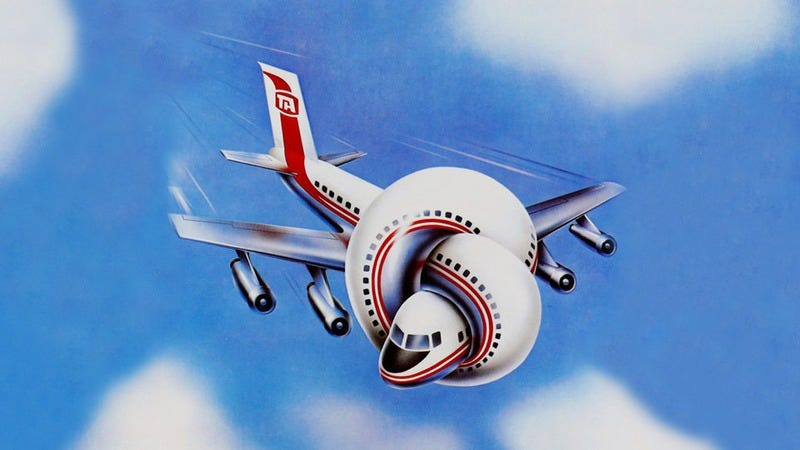

Air crash is also known as an aviation accident and incident. Much of the aviation such as airplane, helicopter, air balloon and jet plane are design involves ensuring with a high level of safety. However, aviation accidents do happen in anytime and harm human life. It is unpredictable and unpreventable accident with the resulting loss of life tragic.

Aviation accident cases can be extremely complex because it might lead to a lot of things happen in a single time. Many people are at risk of injury when an aviation accident occurs. Injuries from aviation accidents can range from minor cuts and bruises to catastrophic injuries or death. It is depending on the situation of the accident.

The aim of this project is to have a better understanding of the data. We explore the data and try to find some substantial patterns.
In order to have a structural approach in the analysis - we ask ourselves questions during the exploration phase and try to logically explain the observed trends.

## 1. Importing modules

In [1]:
#Setting up the environemnt

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib
import re
import matplotlib.pyplot as plt 
import scipy.stats as stats
from datetime import date, timedelta, datetime
from collections import Counter
import os

print(os.listdir("../input/"))

['Airplane_Crashes_and_Fatalities_Since_1908.csv']


## 2. Loading the data

In [2]:
data = pd.read_csv("../input/Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [3]:
np.random.seed(42) 
obs, feat = data.shape
data.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4793,07/30/2001,16:00,"Haines, Alaska",Air Taxi,NaN,"Shagway, AK - Return",Piper PA-32-300,N39586,32-7840168,6.0,6.0,0.0,The sightseeing plane impacted the side of a m...
5020,11/28/2004,09:55,"Montrose, Colorado",Glow Air/Air Castle - Charter,73,"Montrose, CO - South Bend, IN",Canadair CL-601-2A12 Challenger,N873G,3009,6.0,3.0,0.0,"While attempting to take off from R31, the air..."
655,06/20/1944,NaN,"Porto Alegre, Brazil",Varig,NaN,NaN,Lockheed 10C Electra,PP-VAG,1008,10.0,10.0,0.0,Crashed into a river.
1874,10/09/1963,NaN,"Near Marseilles, France",Aeronaves de Panama,NaN,"Marseilles, France - Dhah, Saudi Arabia",Douglas C-74,HP-385,13915,6.0,6.0,0.0,Crashed shortly after taking off with a cargo ...
2318,06/05/1969,07:12,"North Bend, Oregon",Eureka Aero Inc. - Air Taxi,NaN,NaN,Cessna 337C,N2665S,NaN,3.0,3.0,0.0,Collided with trees on approach. Improper IFR ...


In [4]:
data['Survived'] = data['Aboard'] - data['Fatalities']
data['Survived'].fillna(0, inplace = True)

To ensure our data file read correctly, we see first five columns 

In [5]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survived
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0


## 3. Data Info and Manipulation

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
Survived        5268 non-null float64
dtypes: float64(4), object(10)
memory usage: 576.3+ KB


#### Definition of variables:

Date: Date of accident

Time: Local time, in 24 hr. in the format hh:mm

Location: Location of the accident

Operator: Airline or operator of the aircraft

Flight: Flight number assigned by the aircraft operator

Route: Complete or partial route flown prior to the accident

Type: Aircraft type

Registration: ICAO registration of the aircraft

cn/In: Construction or serial number / Line or fuselage number

Aboard: Total people aboard

Fatalities: Total fatalities aboard

Ground: Total killed on the ground

Summary: Brief description of the accident and cause if known

In [7]:
data.shape

(5268, 14)

In [8]:
data.describe()

,Aboard,Fatalities,Ground,Survived
count,5246.000000,5256.000000,5246.000000,5268.000000
mean,27.554518,20.068303,1.608845,7.439825
std,43.076711,33.199952,53.987827,28.089951
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000,0.000000
50%,13.000000,9.000000,0.000000,0.000000
75%,30.000000,23.000000,0.000000,2.000000
max,644.000000,583.000000,2750.000000,516.000000


In [9]:
def null_table(data):
    print(pd.isnull(data).sum())

null_table(data)

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
Survived           0
dtype: int64


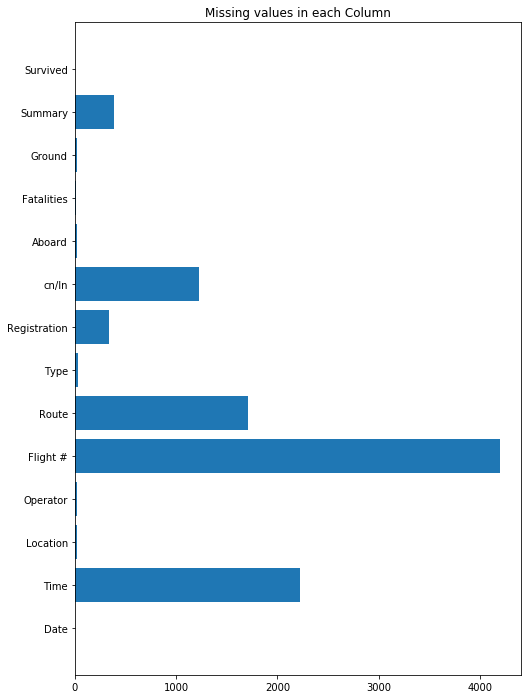

In [10]:
a = [(i, data[i].isna().sum()) for i in data.columns]
labels, ys = zip(*a)
 
plt.figure(figsize=[8,12])
plt.barh(labels, ys , height=0.8)
plt.title("Missing values in each Column")

plt.rcParams.update({'font.size': 20})

As we can see from the outputs above, we have some NaN values. We will replace these values with 0 for the numeric values.

In [11]:
data['Fatalities'].fillna(0, inplace = True)
data['Aboard'].fillna(0, inplace = True)
data['Ground'].fillna(0, inplace = True)

With data on number of fatalities and people aboard, we create a new variable with the number of people that survived the crash and call this variable 'Survived'. We also replace any NaN value with 0 on this column.

In [65]:
data['Survived'] = data['Aboard'] - data['Fatalities'] - data['Ground']
data['Has_Survivors'] = 1
data.loc[data['Survived'] == 0, 'Has_Survivors'] = 0

Now our dataframe looks like this.

In [12]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survived
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0


In [13]:
data_first = data.copy()
data['Time'] = data ['Time'].replace(np.nan, '00:00') ####
data['Time'] = data ['Time'].str.replace('c: ', '')
data['Time'] = data ['Time'].str.replace('c:', '')
data['Time'] = data ['Time'].str.replace('c', '')
data['Time'] = data ['Time'].str.replace('12\'20', '12:20')
data['Time'] = data ['Time'].str.replace('18.40', '18:40')
data['Time'] = data ['Time'].str.replace('0943', '09:43')
data['Time'] = data ['Time'].str.replace('22\'08', '22:08')
data['Time'] = data ['Time'].str.replace('114:20', '00:00')

data.Operator = data.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'
#data['Fatalities'] = data['Fatalities'].fillna(0)
operator = data[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])

## 4. Outlier Detection

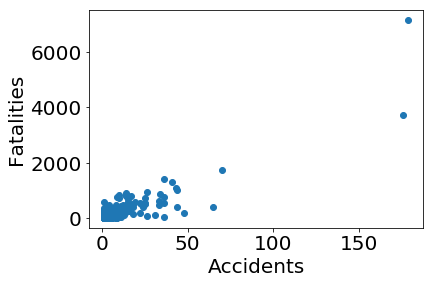

In [15]:
data['Fatalities'] = data['Fatalities'].fillna(0)
X = operator['Fatalities','count']
Y = operator['Fatalities','sum']
plt.scatter(X, Y,label='Operators')
plt.ylabel('Fatalities')
plt.xlabel('Accidents');

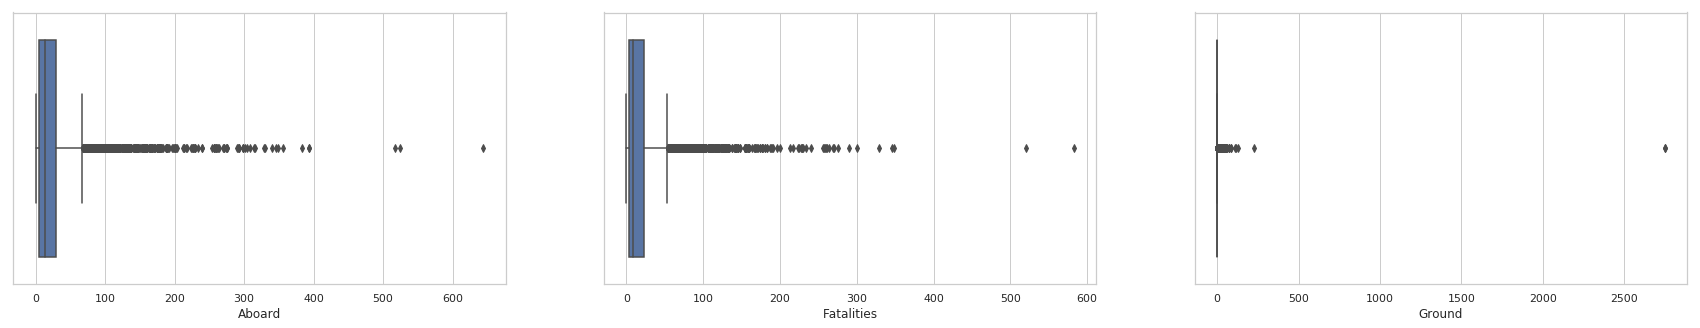

In [66]:
plt.figure(figsize=(30, 5))
ind = 1

for col in data.loc[:,'Aboard':'Ground'].columns:
    plt.subplot(1, 3, ind)
    sns.boxplot(x=data[col])
    ind += 1

In [16]:
data_first['Fatalities_percentage'] = data['Fatalities'] / data['Aboard']
print(data_first['Fatalities_percentage'].head(5))

0    0.5
1    1.0
2    1.0
3    0.7
4    1.0
Name: Fatalities_percentage, dtype: float64


In [17]:
print("Skewness: %f" % data['Fatalities'].skew())
print("Kurtosis: %f" % data['Fatalities'].kurt())

Skewness: 4.952818
Kurtosis: 42.889113


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


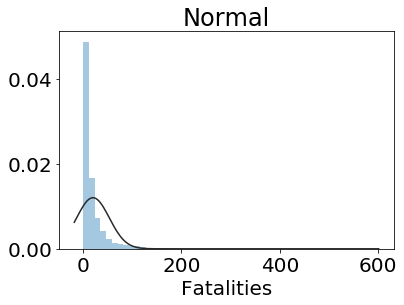

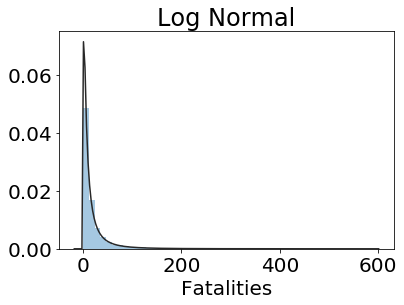

In [18]:
y = data['Fatalities']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [19]:
data["log_Fatalities"] = np.log1p(data["Fatalities"])
print("Skewness: %f" % data['log_Fatalities'].skew())
print("Kurtosis: %f" % data['log_Fatalities'].kurt())


Skewness: 0.339361
Kurtosis: -0.467497


## 4. Visualizations


**Birds-eye Approach**

It is always good to start from a "higher-view" and then gradually move into deeper analysis. For the sake of simplicity and making our analysis fruitful, let us define two characteristics of the the data -

**Dimensions:** are variables in the context of analysis 

**Measures:** the change in these values, changes the "measure"
In the first part, we explore basic questions such as: Is there a pattern between Military flights and fatalities?. 

This way we start off from a birds-eye view and move towards deeper patterns between different dimensions.
In the higher levels, we can explore the relationship between groups of dimensions agaisnt the measures. In higher levels, we can answer questions based on the patterns

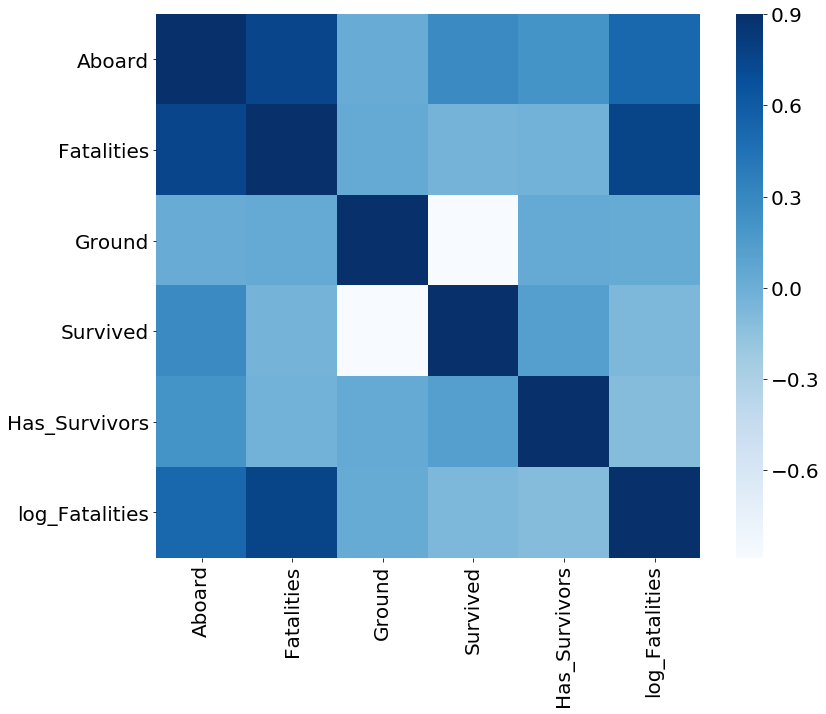

In [20]:
#Correlation matrix
corr = data.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

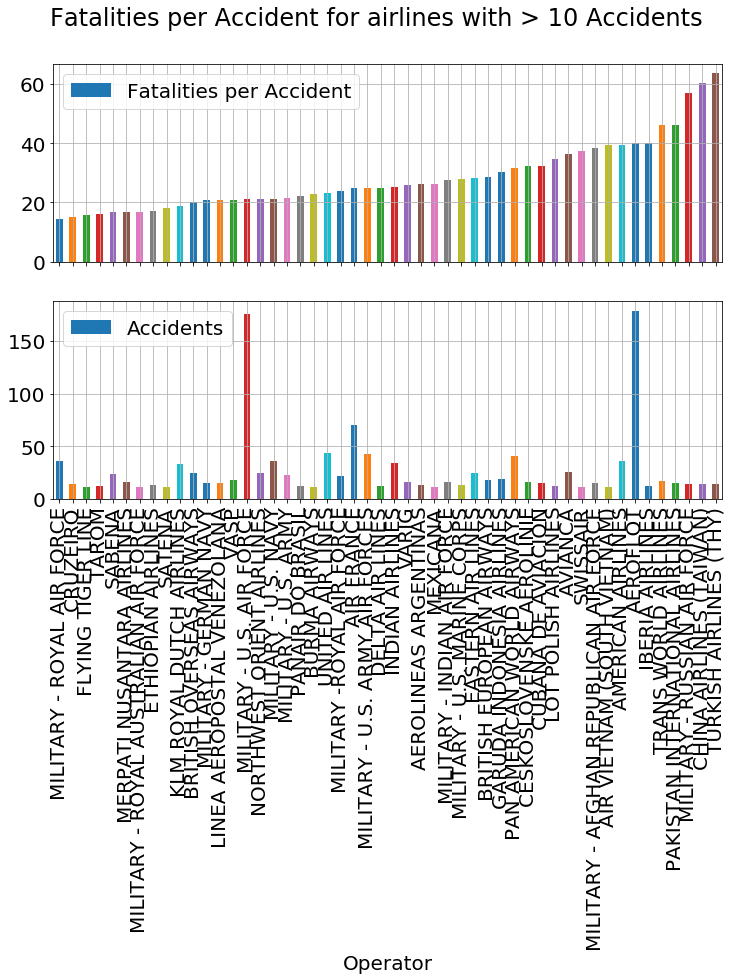

In [21]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
#Lets take a look at the proportion of fatalities per accident for specific operators.
#This bears out some interesting statistics.
props = operator['Fatalities'].reset_index()
props['Fatalities per Accident'] = props['sum']/props['count']
props.columns = ['Operator','Fatalities','Accidents','Fatalities per Accident']

fig_p,(axp1,axp2) = plt.subplots(2,1,sharex = True)
minacc = 10
fig_p.suptitle('Fatalities per Accident for airlines with > %s Accidents' % minacc)
propstoplot = props[props['Accidents']>minacc]
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Fatalities per Accident'
                                                               , ax = axp1
                                                               , kind = 'bar'
                                                               , grid = True)
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Accidents'
                                                               , ax = axp2
                                                               , kind = 'bar'
                                                               , grid = True)

In [67]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].map(lambda x: x.day)
data['Year'] = data['Date'].map(lambda x: x.year)
data['Month'] = data['Date'].map(lambda x: x.month)

In [68]:
crashes_per_year = Counter(data['Year'])
years = list(crashes_per_year.keys())
crashes_year = list(crashes_per_year.values())
crashes_per_day = Counter(data['Day'])
days = list(crashes_per_day.keys())
crashes_day = list(crashes_per_day.values())

In [24]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

data['Season'] = data['Month'].apply(get_season)

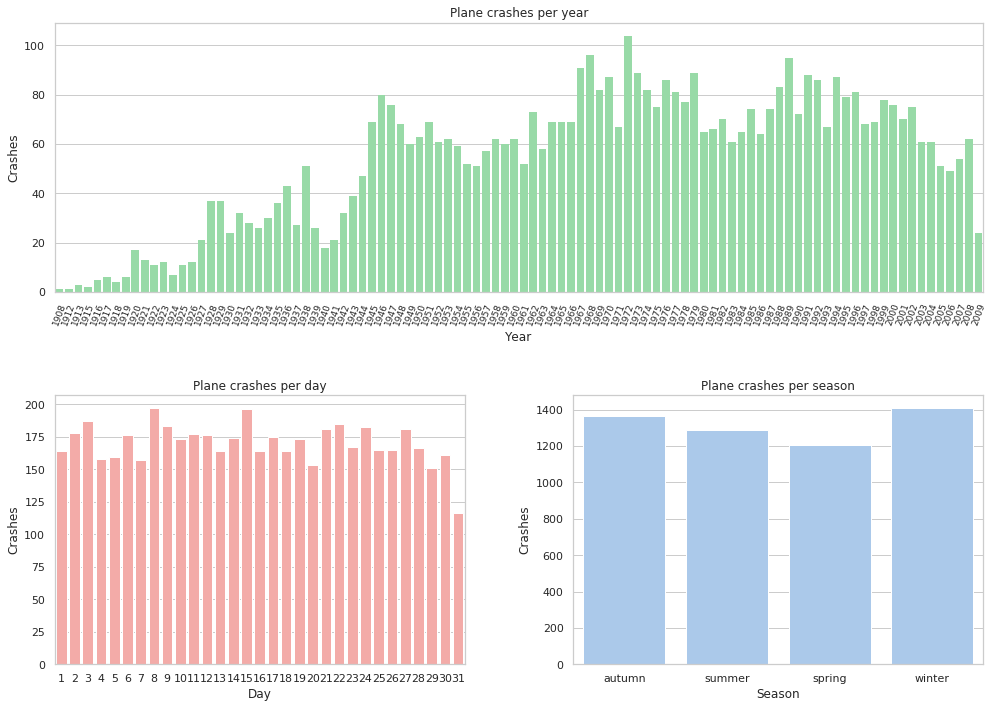

In [25]:
crashes_per_season = Counter(data['Season'])
seasons = list(crashes_per_season.keys())
crashes_season = list(crashes_per_season.values())

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

fig = plt.figure(figsize=(14, 10))

sub1 = fig.add_subplot(211)
sns.barplot(x=years, y=crashes_year, color='g', ax=sub1)
sub1.set(ylabel="Crashes", xlabel="Year", title="Plane crashes per year")
plt.setp(sub1.patches, linewidth=0)
plt.setp(sub1.get_xticklabels(), rotation=70, fontsize=9)

sub2 = fig.add_subplot(223)
sns.barplot(x=days, y=crashes_day, color='r', ax=sub2)
sub2.set(ylabel="Crashes", xlabel="Day", title="Plane crashes per day")

sub3 = fig.add_subplot(224)
sns.barplot(x=seasons, y=crashes_season, color='b', ax=sub3)
texts = sub3.set(ylabel="Crashes", xlabel="Season", title="Plane crashes per season")

plt.tight_layout(w_pad=4, h_pad=3)

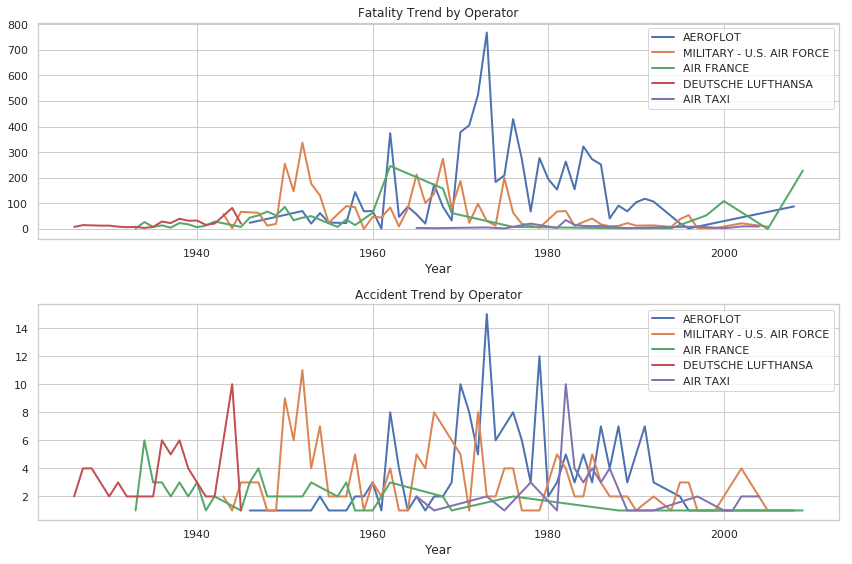

In [26]:
accidents = operator['Fatalities','count'].sort_values(ascending=False)
interestingOps = accidents.index.values.tolist()[0:5]
optrend = data[['Operator','Year','Fatalities']].groupby(['Operator','Year']).agg(['sum','count'])
ops = optrend['Fatalities'].reset_index()
fig,axtrend = plt.subplots(2,1)
for op in interestingOps:
    ops[ops['Operator']==op].plot(x='Year',y='sum',ax=axtrend[0],grid=True,linewidth=2)
    ops[ops['Operator']==op].plot(x='Year',y='count',ax=axtrend[1],grid=True,linewidth=2)

axtrend[0].set_title('Fatality Trend by Operator')
axtrend[1].set_title('Accident Trend by Operator')
linesF, labelsF = axtrend[0].get_legend_handles_labels()
linesA, labelsA = axtrend[1].get_legend_handles_labels()
axtrend[0].legend(linesF,interestingOps)
axtrend[1].legend(linesA,interestingOps)
plt.tight_layout()

Summary of the count of accidents per year:

In [28]:
total_crashes_year = data[['Year', 'Date']].groupby('Year').count()
total_crashes_year = total_crashes_year.reset_index()
total_crashes_year.columns = ['Year', 'Crashes']

Line plot with Seaborn.

Text(0,0.5,'number of crashes')

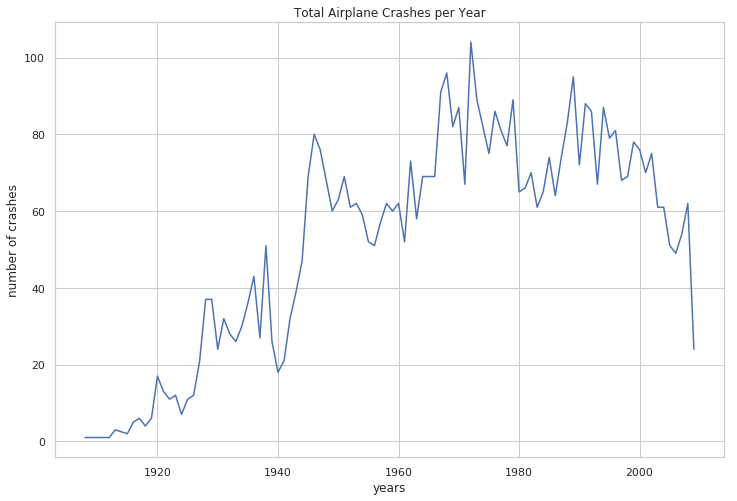

In [29]:
sns.lineplot(x = 'Year', y = 'Crashes', data = total_crashes_year)
plt.title('Total Airplane Crashes per Year')
plt.xlabel('years')
plt.ylabel('number of crashes')

We see that after 40's, there is a significant increase in airplane crashes. The highest peaks are between 1960 and 2000.

Plot of the death toll per year:

In [30]:
pcdeaths_year = data[['Year', 'Fatalities']].groupby('Year').sum()
pcdeaths_year.reset_index(inplace = True)

Text(0.5,0,'Years')

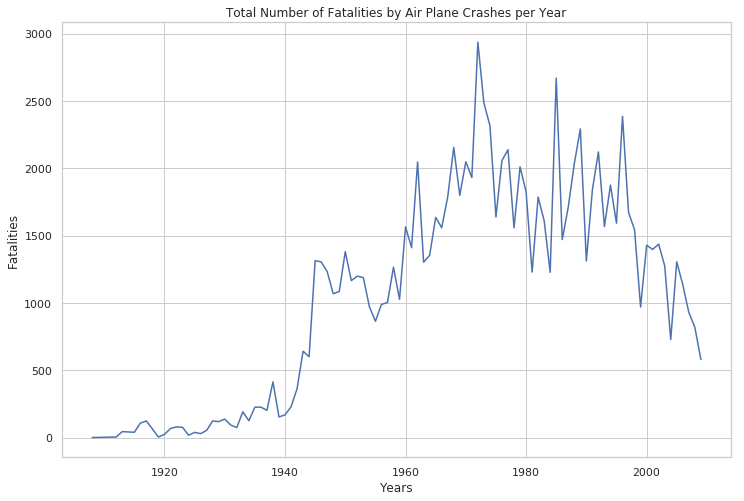

In [31]:
# Plot
sns.lineplot(x = 'Year', y = 'Fatalities', data = pcdeaths_year)
plt.title('Total Number of Fatalities by Air Plane Crashes per Year')
plt.xlabel('Fatalities')
plt.xlabel('Years')

Here we can see the same pattern, the years that had the most accidents are also the ones with the most fatalities

Plot of the people aboard in airplanes per year:

In [32]:
# summarise
abrd_per_year = data[['Year', 'Aboard']].groupby('Year').sum()
abrd_per_year = abrd_per_year.reset_index()

Text(0,0.5,'Count')

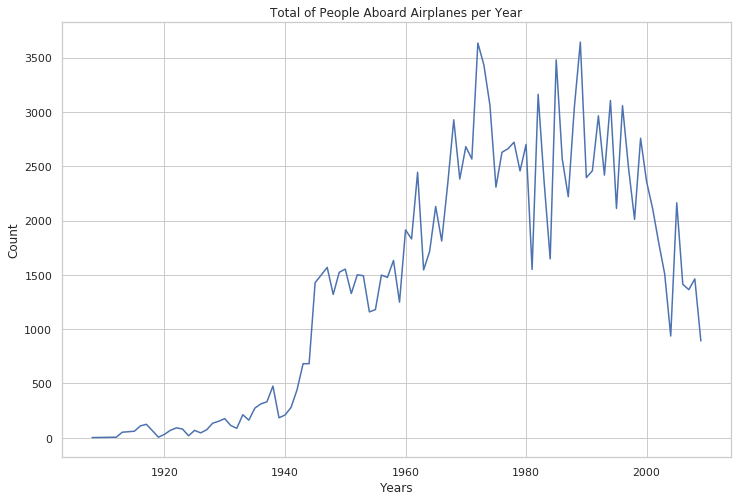

In [33]:
# plot
sns.lineplot(x = 'Year', y = 'Aboard', data = abrd_per_year)
plt.title('Total of People Aboard Airplanes per Year')
plt.xlabel('Years')
plt.ylabel('Count')

From the 40's, the number of people aboard airplanes starts to increase. From 1960 to 2000 is where we have most people aboard, the same years with most plane crashes and fatalities.

### Fatalities vs Survived vs Killed on Ground

In [34]:
#summarise
FSG_per_year = data[['Year', 'Fatalities', 'Survived', 'Ground']].groupby('Year').sum()
FSG_per_year = FSG_per_year.reset_index()

Text(0.5,1,'Fatalities vs Survived vs Killed on Ground per Year')

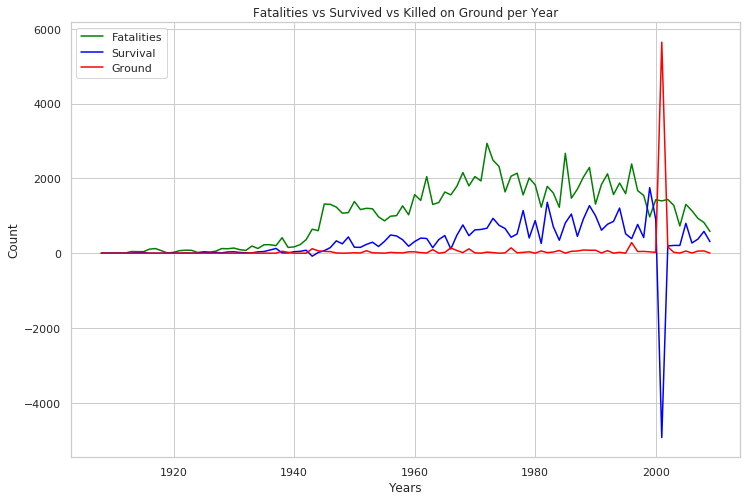

In [35]:
#plot
sns.lineplot(x = 'Year', y = 'Fatalities', data = FSG_per_year, color = 'green')
sns.lineplot(x = 'Year', y = 'Survived', data = FSG_per_year, color = 'blue')
sns.lineplot(x = 'Year', y = 'Ground', data = FSG_per_year, color = 'red')
plt.legend(['Fatalities', 'Survival', 'Ground'])
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Fatalities vs Survived vs Killed on Ground per Year')

The total number of travelers aboard airplane crashes declined in the past two decades. This in line with the total crashes per year shown in the previous chart. In the last 20 years, fatalities also declined as would be expected with the decline of travelers involved in crashes. However, fatalities continue to exceed the number of survivors per year with the exception of 1999. On the otherhand the gap in the difference between the number of fatalities and survivors has decreased over the years.

In [36]:
oper_list = Counter(data['Operator']).most_common(10)
operators = []
crashes = []
for tpl in oper_list:
    if 'Military' not in tpl[0]:
        operators.append(tpl[0])
        crashes.append(tpl[1])
print('Top 10 the worst operators')
pd.DataFrame({'Count of crashes' : crashes}, index=operators)

Top 10 the worst operators


,Count of crashes
AEROFLOT,179
MILITARY - U.S. AIR FORCE,176
AIR FRANCE,70
DEUTSCHE LUFTHANSA,65
AIR TAXI,48
CHINA NATIONAL AVIATION CORPORATION,44
UNITED AIR LINES,44
MILITARY - U.S. ARMY AIR FORCES,43
PAN AMERICAN WORLD AIRWAYS,41
MILITARY - U.S. NAVY,36


In [37]:
loc_list = Counter(data['Location'].dropna()).most_common(10)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
print('Top 10 the most dangerous locations')
pd.DataFrame({'Crashes in this location' : crashes}, index=locs)

Top 10 the most dangerous locations


,Crashes in this location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


In [38]:
print('Top 7 most dangerous routes')
route= data.groupby('Route').agg({'Fatalities':['sum',lambda x:x.sum() / data['Fatalities'].sum()]})
route.columns=route.columns.map(''.join)
route.reset_index(inplace=True)
route.rename(columns={'Fatalitiessum':'Total Fatalities','Fatalities<lambda_0>':'% of Total Fatalities'}, inplace=True)

route.sort_values(by='Total Fatalities', ascending=False).head(7)

Top 7 most dangerous routes


,Route,Total Fatalities,Fatalities<lambda>
2968,Tenerife - Las Palmas / Tenerife - Las Palmas,583.0,0.005527
3012,Tokyo - Osaka,557.0,0.005281
3029,Training,457.0,0.004333
2276,Paris - London,375.0,0.003555
2057,New Delhi - Dhahran / Chimkent - New Delhi,349.0,0.003309
1957,Montreal - London,329.0,0.003119
2522,Riyadh - Jeddah,301.0,0.002854


#### Takeaway
Number of airplane crashes per year peaked to over 100 crashes in 1972 and have been steadily declining since.

Number of annual fatalities have also declined from 1975 to 2009.

The annual survival rate for nearly all plane crashes since 1975 have exceeded 20%.

## 5. Text Clustering with K-Means

K means Clustering is an unsupervised machine learning algorithm that aims to partition observations into clusters in which each observation belongs to the cluster with the nearest mean.

In an attempt to create meaningful definitive groups or "crash categories", the k means partitional clustering analysis technique will be applied to find similarities between airplane crashes based on: the number of people aboard, fatalities, survivors and survival rates. Twenty year intervals will also be applied to the clustering analysis model in the event technical advances that took place over the years may have contributed to increasing or decreasing crash events.

### 5.1 Importing needed modules

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 5.2 Data Preparation

In the 'Summary' column, we have NaN values as well, so we're going to create a new dataframe with the 'Summary' data and dropping all rows with NaN values.

In [40]:
text_data = data['Summary'].dropna()
text_data = pd.DataFrame(text_data)
# for reproducibility
random_state = 0  

K Means normally works with numbers only: we need to have numbers. To get numbers, we do feature extraction.

The feature we’ll use is TF-IDF, a numerical statistic. This statistic uses term frequency and inverse document frequency.
The method TfidfVectorizer() implements the TF-IDF algorithm.

In [41]:
documents = list(text_data['Summary'])
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

### 5.3 Model Fitting

And now we fit the model. For this analysis, we'll be using the KMeans algorithm with 5 clusters.

In [42]:
model = MiniBatchKMeans(n_clusters=5, random_state=random_state)
model.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

What are the cluster center vectors?

In [43]:
model.cluster_centers_

array([[3.32853808e-04, 5.61597890e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.52139182e-04, 9.42550033e-03, 8.27526103e-05, ...,
        2.97713352e-04, 2.25400527e-04, 0.00000000e+00],
       [0.00000000e+00, 8.77272673e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.34328619e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.41261664e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [44]:
model.predict(X)

model.labels_

array([1, 1, 1, ..., 1, 2, 0], dtype=int32)

In [45]:
print ('Most Common Terms per Cluster:')

order_centroids = model.cluster_centers_.argsort()[:,::-1] 
terms = vectorizer.get_feature_names()

for i in range(5):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: 
        print ('%s' % terms[j]),
    print

Most Common Terms per Cluster:


Cluster 0:
en
route
crashed
disappeared
mountain
plane
cargo
weather
flight
pilot


Cluster 1:
aircraft
approach
crashed
flight
pilot
weather
runway
mountain
conditions
struck


Cluster 2:
crashed
plane
taking
cargo
attempting
land
mountain
shortly
sea
fog


Cluster 3:
midair
collision
killed
aboard
dc
cessna
avoid
piper
air
mid


Cluster 4:
takeoff
engine
crashed
failure
shortly
plane
aircraft
lost
failed
runway


## 5.4 Visualization
To visualize, we’ll plot the features in a 2D space. As we know the dimension of features that we obtained from TfIdfVectorizer is quite large ( > 10,000), we need to reduce the dimension before we can plot. For this, we’ll uses PCA to transform our high dimensional features into 2 dimensions.

In [46]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X.toarray())


reduced_cluster_centers = pca.transform(model.cluster_centers_)

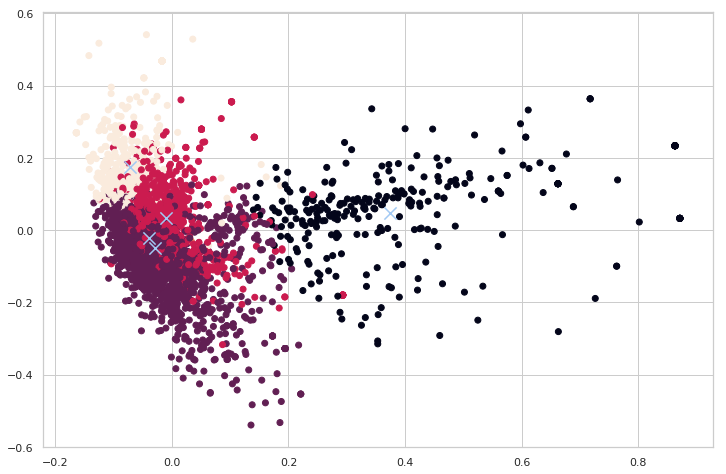

In [47]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

## 5.5 Prediction

In [48]:
print("\n")
print("Prediction")

Y = vectorizer.transform(["engine failure"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["terrorism"])
prediction = model.predict(Y)
print(prediction)
 



Prediction
[4]
[1]


## 6. Text Clustering with DBSCAN

### (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a density-based clustered algorithm similar to mean-shift, but with a couple of notable advantages.

DBSCAN begins with an arbitrary starting data point that has not been visited. The neighborhood of this point is extracted using a distance epsilon ε (All points which are within the ε distance are neighborhood points).
If there are a sufficient number of points (according to minPoints) within this neighborhood then the clustering process starts and the current data point becomes the first point in the new cluster. Otherwise, the point will be labeled as noise (later this noisy point might become the part of the cluster). In both cases that point is marked as “visited”.
For this first point in the new cluster, the points within its ε distance neighborhood also become part of the same cluster. This procedure of making all points in the ε neighborhood belong to the same cluster is then repeated for all of the new points that have been just added to the cluster group.
This process of steps 2 and 3 is repeated until all points in the cluster are determined i.e all points within the ε neighborhood of the cluster have been visited and labeled.
Once we’re done with the current cluster, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise. This process repeats until all points are marked as visited. Since at the end of this all points have been visited, each point will have been marked as either belonging to a cluster or being noise.
DBSCAN poses some great advantages over other clustering algorithms. Firstly, it does not require a pe-set number of clusters at all. It also identifies outliers as noises, unlike mean-shift which simply throws them into a cluster even if the data point is very different. Additionally, it can find arbitrarily sized and arbitrarily shaped clusters quite well.

In [49]:
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [50]:
text_data = data['Summary'].dropna()
text_data = pd.DataFrame(text_data)

In [51]:
documents = list(text_data['Summary'])
vectorizer = TfidfVectorizer(stop_words='english') # Stop words are like "a", "the", or "in" which don't have significant meaning
X = vectorizer.fit_transform(documents)

In [52]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler(with_mean=False) 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X = normalize(X_scaled) 

In [53]:
# for reproducibility
random_state = 0 
model = DBSCAN(eps = 0.9, min_samples = 8)
model.fit(X)
labels = model.labels_
print(labels)

[-1 -1 -1 ... -1 -1 -1]


In [54]:
print(model.core_sample_indices_)

[  32   34   42   43   46   51   52   58   92  106  110  131  138  158
  160  174  189  214  220  226  234  235  236  242  243  258  260  274
  287  288  303  318  325  328  338  360  361  374  386  393  409  420
  423  425  427  428  432  435  450  457  469  474  484  495  504  505
  507  529  538  546  578  594  603  620  622  624  636  640  645  654
  659  661  680  690  692  705  719  735  752  757  759  786  794  800
  803  805  811  822  832  845  847  865  870  872  883  885  887  892
  895  903  905  907  912  919  938  948  973  991  997 1003 1019 1028
 1033 1036 1042 1051 1070 1086 1090 1113 1120 1140 1145 1170 1178 1192
 1229 1234 1237 1271 1295 1301 1337 1359 1363 1368 1371 1379 1380 1386
 1423 1444 1462 1473 1481 1496 1501 1525 1557 1584 1596 1606 1612 1615
 1659 1670 1673 1676 1682 1684 1688 1707 1716 1728 1734 1738 1758 1776
 1816 1832 1840 1843 1852 1858 1864 1866 1873 1883 1944 1946 1952 1967
 1969 1970 1977 1981 1988 1991 1998 2039 2044 2079 2081 2105 2125 2127
 2157 

In [55]:
print(model.components_)

  (0, 9032)	0.6217119776519099
  (0, 6498)	0.7487436954292788
  (0, 2320)	0.22990671020885523
  (1, 7237)	0.6691737639603969
  (1, 3047)	0.6805373267354987
  (1, 2320)	0.2984550561588392
  (2, 3276)	0.7726360951652866
  (2, 3070)	0.6348491666905912
  (3, 3276)	0.7726360951652866
  (3, 3070)	0.6348491666905912
  (4, 3276)	0.7726360951652866
  (4, 3070)	0.6348491666905912
  (5, 3509)	0.9571571365227329
  (5, 2320)	0.2895690176859438
  (6, 3118)	0.8649452768425215
  (6, 6389)	0.5018661854197928
  (7, 3276)	0.7726360951652866
  (7, 3070)	0.6348491666905912
  (8, 5157)	0.6180416718107372
  (8, 7237)	0.1975390992198605
  (8, 3047)	0.20089360603919063
  (8, 6427)	0.1458245797315558
  (8, 7975)	0.7138750048258337
  (8, 2320)	0.08810348840083808
  (9, 4038)	0.7795121635936113
  :	:
  (319, 1006)	0.9436206566775635
  (319, 2320)	0.3310287846870783
  (320, 1646)	0.6322092754873192
  (320, 850)	0.549747906831004
  (320, 6427)	0.46730685040997816
  (320, 2320)	0.28233486940623337
  (321, 9032)	0.45

In [56]:
pca = PCA(n_components=2, random_state=random_state)
X_principal = pca.fit_transform(X.toarray()) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

         P1        P2
0 -0.040980 -0.016299
1 -0.038564 -0.014936
2 -0.041132 -0.016514
3 -0.039490 -0.015027
4 -0.041064 -0.015480


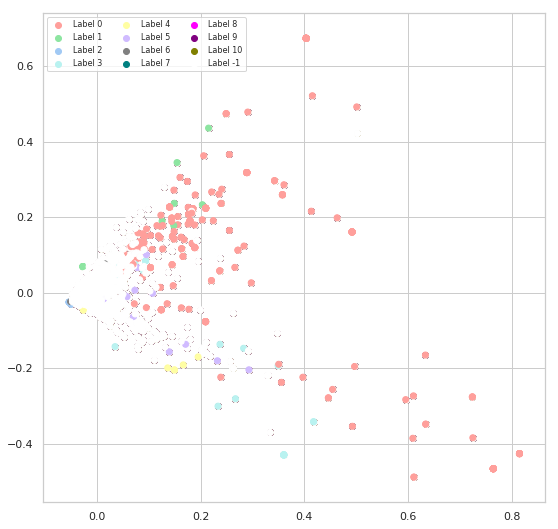

In [57]:
import matplotlib.pyplot as plt 
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[6] = '#808080'
colours1[7] = '#008080'
colours1[8] = '#FF00FF'
colours1[9] = '#800080'
colours1[10] = '#00FF00'
colours1[-1] = 'w'

cvec = [colours1[label] for label in labels] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', '#808080','#008080', '#FF00FF' ,'#800080', '#808000' , 'w' ] 

plt.figure(figsize =(9, 9)) 
r = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0]) 
g = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1]) 
b = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2]) 
c = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3]) 
y = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4]) 
m = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5]) 
grey= plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])

teal = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[7])

Fuchsia = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[8])

Purple = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[9])

Olive = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[10])

k = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[-1])

plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m,grey,teal ,Fuchsia,Purple,Olive,k), 
		('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10','Label -1'), scatterpoints = 1, 
		loc ='upper left', 
		ncol = 3, 
		fontsize = 8) 

plt.show()

There is always a scope for hyperparameter tuning to improve DBSCAN clustering.

The main drawback of DBSCAN is that it doesn’t perform as well as others when the clusters are of varying density. This is because the setting of the distance threshold ε and minPoints for identifying the neighborhood points will vary from cluster to cluster when the density varies. This drawback also occurs with very high-dimensional data since again the distance threshold ε becomes challenging to estimate.

DBSCAN Example
from sklearn.cluster import DBSCAN

X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])

clustering = DBSCAN(eps=3, min_samples=2).fit(X)

print(clustering.labels_)

[ 0 0 0 1 1 -1]

## 7. Causes of the crash

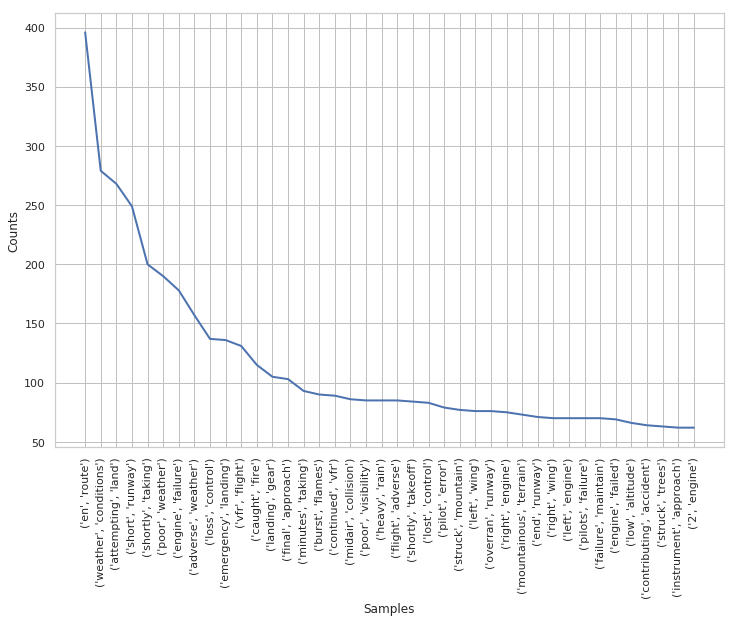

In [58]:
from nltk import bigrams
from nltk import FreqDist
from nltk.corpus import stopwords
from gensim import corpora, models
import string

def remove_punctuation(s):
    exclude = set(string.punctuation)
    s = ''.join([i for i in s if i not in exclude])
    return s

stop = stopwords.words('english')
stop.append('plane')
stop.append('crashed')
stop.append('aircraft')

t = data[['Summary','Fatalities']].dropna()
book = t['Summary'].str.lower().apply(remove_punctuation).str.split().values.sum()
wrd = [w for w in book if w not in stop]


bigrams = list(bigrams(wrd))
fdistBigram = FreqDist(bigrams)
fdistBigram.plot(40)

In [59]:
summary = data['Summary'].tolist()
punctuation = ['.', ',', ':']
texts = []

for text in summary:
    cleaned_text = str(text).lower()   
    for mark in punctuation:
        cleaned_text = cleaned_text.replace(mark, '')       
    texts.append(cleaned_text.split())

In [60]:
dictionary = corpora.Dictionary(texts)

In [61]:
word_list = []
for key, value in dictionary.dfs.items():
    if value > 100:
        word_list.append(key)

dictionary.filter_tokens(word_list)
corpus = [dictionary.doc2bow(text) for text in texts]

In [62]:
np.random.seed(76543)
lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=5)

In [63]:
topics = lda.show_topics(num_topics=10, num_words=15, formatted=False)
for topic in topics:
    num = int(topic[0]) + 1
    print('Cause %d:' % num, end=' ')
    print(', '.join([pair[0] for pair in topic[1]]))

Cause 1: descending, radar, clearance, mountainous, ridge, passenger, adequate, management, their, remote, cruise, atc, jungle, meteorological, been
Cause 2: oil, subsequent, canyon, destroyed, included, km, coordination, lines, missing, pressure, number, flap, turned, double, maintenance
Cause 3: stall, end, nose, attitude, warning, 1, snow, ils, airspeed, overloaded, rudder, captain's, until, missed, follow
Cause 4: side, positioning, thrust, cessna, use, maintenance, went, carrying, tower, problems, seconds, rolled, reverse, their, angle
Cause 5: disappeared, impacted, contact, ceiling, later, they, meteorological, destination, days, along, training, factor, 10, experience, island
Cause 6: rebels, missile, ocean, controlled, lake, hillside, icing, km, experiencing, only, military, indicated, surface-to-air, unita, excessive
Cause 7: jet, other, military, avoid, winds, just, maneuver, midair, burst, see, fighter, transport, may, houses, been
Cause 8: international, cockpit, weight, t

While we were analysing the words in each topic, we have identified the following causes (they may not reflect the actual reason for the crash):

**Cause 1**: Spatial disorientation due to bad weather conditions.

**Cause 2:** Stalled the engine. The explosion or destruction of the aircraft from falling to the ground or collision with the building.

**Cause 3:** Failure of the rotor or problems with the fuselage (specifically problems with the tail). It is also a possible mistake of the Air Traffic Control centre.

**Cause 4:** Bad weather conditions: strong wind, snow, ice. The plane disappeared from radar.

**Cause 5:** Taking off without clearance from ATC. ATC or pilots error.

**Cause 6**: Crash due to manoeuvring. Most likely refers to the testing and training missions.

**Cause 7:** The plane was hijacked or captured by the rebels. Fell to the ground due to issues with piloting or bad weather conditions.

**Cause 8:** The plane was destroyed by explosion and destruction of the fuselage. The cause of the explosion could be a bomb or fuel tank.

**Cause 9:** The malfunction of the autopilot and remote control systems. Most likely associated with transport aircraft.

**Cause 10:** Navigation problems, technical malfunction.

## Conclusion

* Majority of crash sites appear in the northern hemisphere.

* Majority of crashes occur near the coast of countries of continents.

* More than 2/3 of large passenger crashes have high fatality

* No clear location advantage for high survival vs. high fatality other than more survivable crashes occur over land and more high fatality crashes occur over oceans or seas.